In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
purchase = pd.read_csv("purchase.csv")
browse = pd.read_csv("browse.csv")
skv = pd.read_csv("sku.csv")
userid = pd.read_csv("userid.csv")

In [7]:
purchase.head()

,User Id,Date,SKU
0,311DBC84,10/11/2017,178394
1,2B1F305E,10/1/2017,214049
2,5429C2C,10/9/2017,178735
3,284FACC4,10/28/2017,217190
4,28CC59,8/11/2017,141740


In [8]:
browse.head()

,User ID,Date,SKU
0,264BCFBA,12/24/2017,302445
1,570B6CA,12/10/2017,135119
2,237446F5,11/10/2017,135119
3,1388A512,12/10/2017,141244
4,16457B5F,11/22/2017,181450


In [9]:
skv.head(3)

,SKU,Description,Category Description
0,122451.0,CURVE BOW GLOVE A4,Handbags & Access
1,124549.0,PIPED DRIVING GLO F0,Handbags & Access
2,126412.0,SIDE BOW GLOVE Y0,Handbags & Access


In [10]:
userid.head(3)

,User id,Age
0,CF96A4F,25
1,2A95F376,49
2,2C68D6D0,47


In [11]:
purchase.shape

(3607, 3)

In [12]:
browse.shape

(5826, 3)

In [13]:
skv.shape

(256, 3)

In [14]:
userid.shape

(1199, 2)

In [15]:
purchase_behaviour = pd.merge(purchase, skv, on='SKU')

In [19]:
purchase_behaviour.head(3)

,User Id,Date,SKU,Description,Category Description
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access
1,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access
2,26A00E7F,11/29/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access


In [20]:
purchase_behaviour.shape

(3607, 5)

In [23]:
userid['User Id'] = userid['User id']
del userid['User id']

In [24]:
purchase_behaviour = pd.merge(purchase_behaviour, userid, on='User Id')

In [25]:
purchase_behaviour.head()

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25
3,26C2EE87,12/10/2017,186796,MIMOSA PRINT BANG N4,Jewellery,25
4,26C2EE87,10/28/2017,135119,PATENT CHARM GLOV Y4,Handbags & Access,25


In [26]:
purchase_behaviour.tail()

,User Id,Date,SKU,Description,Category Description,Age
3602,18028E1D,12/22/2017,172185,BOBBLE SCARF F4,Handbags & Access,24
3603,2A34B4F2,10/7/2017,172185,BOBBLE SCARF F4,Handbags & Access,53
3604,265F7284,8/17/2017,172185,BOBBLE SCARF F4,Handbags & Access,31
3605,1C3B081D,8/22/2017,219484,SPECKLE WOOD BANG R8,Jewellery,25
3606,9C4465D,10/14/2017,219484,SPECKLE WOOD BANG R8,Jewellery,26


In [28]:
purchase_behaviour.apply(lambda x : sum(x.isnull()))

User Id                 0
Date                    0
SKU                     0
Description             0
Category Description    0
Age                     0
dtype: int64

In [29]:
purchase_behaviour.apply(lambda x : len(x.unique()))

User Id                 1137
Date                     153
SKU                       80
Description               80
Category Description       2
Age                       36
dtype: int64

In [32]:
browse_behaviour = pd.merge(browse, skv, on='SKU')

In [33]:
browse_behaviour.head(3)

,User ID,Date,SKU,Description,Category Description
0,264BCFBA,12/24/2017,302445,COLORADO LRG RC NP,Luggage
1,423BED3,12/3/2017,302445,COLORADO LRG RC NP,Luggage
2,3D37D85,11/24/2017,302445,COLORADO LRG RC NP,Luggage


In [34]:
browse_behaviour['User Id'] = browse_behaviour['User ID']
del browse_behaviour['User ID']

In [35]:
browse_behaviour = pd.merge(browse_behaviour, userid, on='User Id')

In [36]:
browse_behaviour.head(3)

,Date,SKU,Description,Category Description,User Id,Age
0,12/24/2017,302445,COLORADO LRG RC NP,Luggage,264BCFBA,20
1,12/6/2017,303791,SCORPIUS LRG R WL,Luggage,264BCFBA,20
2,11/16/2017,200573,ZIG ZAG BANGLE J4,Jewellery,264BCFBA,20


In [37]:
purchase_behaviour.head(3)

,User Id,Date,SKU,Description,Category Description,Age
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48
2,26C2EE87,12/2/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,25


In [38]:
browse_behaviour.apply(lambda x : sum(x.isnull()))

Date                    0
SKU                     0
Description             0
Category Description    0
User Id                 0
Age                     0
dtype: int64

In [39]:
browse_behaviour.apply(lambda x : len(x.unique()))

Date                      61
SKU                      144
Description              144
Category Description       3
User Id                 1186
Age                       36
dtype: int64

In [41]:
print(purchase_behaviour.shape)
print(browse_behaviour.shape)

(3607, 6)
(5826, 6)


In [43]:
purchase_behaviour.to_csv("purchase_behaviour.csv", index = False)
browse_behaviour.to_csv("browse_behaviour.csv", index = False)

# Popularity Based Model

There are 80 unique items


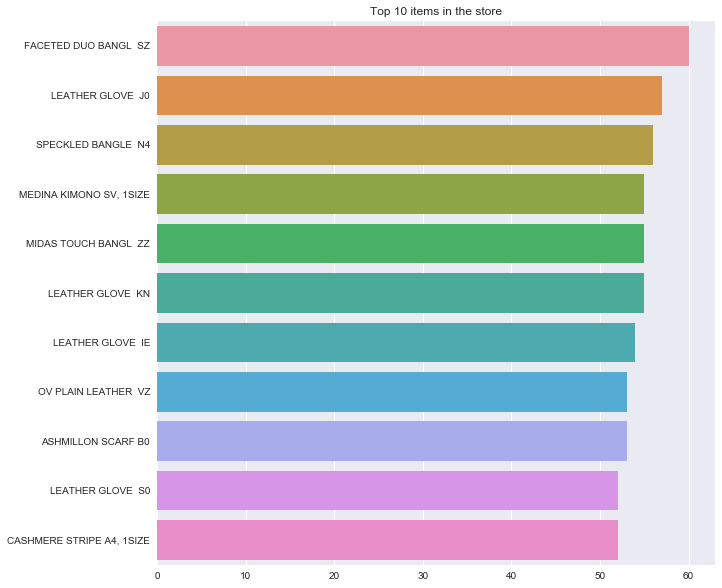

FACETED DUO BANGL  SZ        60
LEATHER GLOVE  J0            57
SPECKLED BANGLE  N4          56
MEDINA KIMONO SV, 1SIZE      55
MIDAS TOUCH BANGL  ZZ        55
LEATHER GLOVE  KN            55
LEATHER GLOVE  IE            54
OV PLAIN LEATHER  VZ         53
ASHMILLON SCARF B0           53
LEATHER GLOVE  S0            52
CASHMERE STRIPE A4, 1SIZE    52
Name: Description, dtype: int64


In [45]:
#Top brands
popularity_counts = purchase_behaviour["Description"].value_counts()
print("There are", popularity_counts.size, "unique items")
#
plt.figure(figsize = (10, 10))
sns.barplot(popularity_counts[0:11].values, popularity_counts[0:11].index)
plt.title("Top 10 items in the store")
plt.show()
print(popularity_counts[0:11])

# Content Based Model

In [46]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
metadata = purchase_behaviour.copy()

In [50]:
metadata.columns

Index(['User Id', 'Date', 'SKU', 'Description', 'Category Description', 'Age'], dtype='object')

In [51]:
#Replace NaN with an empty string
metadata['Description'] = metadata['Description'].fillna('')

In [120]:
tfidf = TfidfVectorizer()

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['Description'].drop_duplicates())

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(80, 115)

In [121]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [122]:
#Construct a reverse map of indices and Product titles
indices = pd.Series(metadata.index, index=metadata['Description']).drop_duplicates()

In [124]:
indices.drop_duplicates

<bound method Series.drop_duplicates of Description
ASHMILLON GLOVE A0, 1SIZE       0
OV PLAIN LEATHER  VZ            1
ASHMILLON GLOVE A0, 1SIZE       2
MIMOSA PRINT BANG  N4           3
PATENT CHARM GLOV  Y4           4
INCA STACKERS  H6               5
ASHMILLON BERET A0, 1SIZE       6
ASHMILLON GLOVE A0, 1SIZE       7
MEDINA KIMONO SV                8
CASHMERE STRIPE F4              9
ANIMAL BANGLE  N4              10
ASHMILLON GLOVE A0, 1SIZE      11
CASHMERE STRIPE A4, 1SIZE      12
ASHMILLON GLOVE A0, 1SIZE      13
MIMOSA PRINT BANG  N4          14
LEATHER GLOVE  SH              15
SIDE BOW GLOVE  Y0             16
ASHMILLON GLOVE A0, 1SIZE      17
OV PLAIN LEATHER  B0           18
ASHMILLON GLOVE A0, 1SIZE      19
MEDINA KIMONO SV, 1SIZE        20
ASHMILLON GLOVE A0, 1SIZE      21
ASHMILLON BERET A0             22
ASHMILLON GLOVE A0, 1SIZE      23
ASHMILLON SCARF B0             24
ASHMILLON SCARF Y0             25
ANIMAL BUCKLE GLO  SH          26
ASHMILLON GLOVE A0, 1SIZE     

In [136]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Description, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    full_idx = indices[Description]
    full_idx = list(full_idx)
    distance = len(full_idx)
    idx = full_idx[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0: 11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['info'].iloc[movie_indices]

In [137]:
get_recommendations('FLORAL RING  Y4')

53                      FLORAL RING  Y4 Jewellery
37            LEATHER GLOVE  KN Handbags & Access
11    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
62        ANIMAL BUCKLE GLO  SH Handbags & Access
16           SIDE BOW GLOVE  Y0 Handbags & Access
43                   ZIG ZAG BANGLE  J4 Jewellery
12    CASHMERE STRIPE A4, 1SIZE Handbags & Access
50    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
23    ASHMILLON GLOVE A0, 1SIZE Handbags & Access
72    CASHMERE STRIPE A4, 1SIZE Handbags & Access
1          OV PLAIN LEATHER  VZ Handbags & Access
Name: info, dtype: object

In [139]:
#2
metadata.head(2)

,User Id,Date,SKU,Description,Category Description,Age,info
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,"ASHMILLON GLOVE A0, 1SIZE Handbags & Access"
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,OV PLAIN LEATHER VZ Handbags & Access


In [130]:
metadata['info'] = metadata['Description'] + " " + metadata['Category Description']

In [131]:
metadata.head(2)

,User Id,Date,SKU,Description,Category Description,Age,info
0,311DBC84,10/11/2017,178394,"ASHMILLON GLOVE A0, 1SIZE",Handbags & Access,48,"ASHMILLON GLOVE A0, 1SIZE Handbags & Access"
1,311DBC84,11/11/2017,141740,OV PLAIN LEATHER VZ,Handbags & Access,48,OV PLAIN LEATHER VZ Handbags & Access


In [132]:
tfidf = TfidfVectorizer()

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['info'].drop_duplicates())

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(80, 118)

In [133]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(Description, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    full_idx = indices[Description]
    full_idx = list(full_idx)
    distance = len(full_idx)
    idx = full_idx[0]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0: 11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['info'].iloc[movie_indices]

# Colloborative